# find the amount of churn in mobile customer data

# how many people will stay in the network and how many will leave
# this same model can be used for predicting how many people will stay in a scheme or leave

# import the modules

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# read the data

In [20]:
#Loading the Telco-Customer-Churn.csv dataset
#https://www.kaggle.com/blastchar/telco-customer-churn
datainput = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# display the data

In [21]:
datainput

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# show how many people are leaving in the current available data

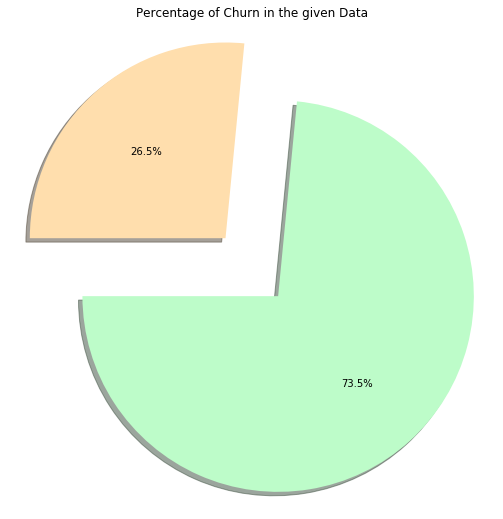

In [22]:
#Dropping columns
datainput.drop(['customerID'], axis=1, inplace=True)
datainput.pop('TotalCharges')
datainput['OnlineBackup'].unique()

data = datainput['Churn'].value_counts(sort = True)
chroma = ["#BDFCC9","#FFDEAD"]
rcParams['figure.figsize'] = 9,9
explode = [0.2,0.2]
plt.pie(data, explode=explode, colors=chroma, autopct='%1.1f%%', shadow=True, startangle=180,)
plt.title('Percentage of Churn in the given Data')
plt.show()

# encode the categorial data as numbers and display the input data

In [24]:
label_encoder = preprocessing.LabelEncoder()
datainput['gender'] = label_encoder.fit_transform(datainput['gender'])
datainput['Partner'] = label_encoder.fit_transform(datainput['Partner'])
datainput['Dependents'] = label_encoder.fit_transform(datainput['Dependents'])
datainput['PhoneService'] = label_encoder.fit_transform(datainput['PhoneService'])
datainput['MultipleLines'] = label_encoder.fit_transform(datainput['MultipleLines'])
datainput['InternetService'] = label_encoder.fit_transform(datainput['InternetService'])
datainput['OnlineSecurity'] = label_encoder.fit_transform(datainput['OnlineSecurity'])
datainput['OnlineBackup'] = label_encoder.fit_transform(datainput['OnlineBackup'])
datainput['DeviceProtection'] = label_encoder.fit_transform(datainput['DeviceProtection'])
datainput['TechSupport'] = label_encoder.fit_transform(datainput['TechSupport'])
datainput['StreamingTV'] = label_encoder.fit_transform(datainput['StreamingTV'])
datainput['StreamingMovies'] = label_encoder.fit_transform(datainput['StreamingMovies'])
datainput['Contract'] = label_encoder.fit_transform(datainput['Contract'])
datainput['PaperlessBilling'] = label_encoder.fit_transform(datainput['PaperlessBilling'])
datainput['PaymentMethod'] = label_encoder.fit_transform(datainput['PaymentMethod'])
datainput['Churn'] = label_encoder.fit_transform(datainput['Churn'])
#print("input data after label encoder :\n",datainput)
datainput

#separating features(X) and label(y)
#datainput["Churn"] = datainput["Churn"].astype(int)
#y = datainput["Churn"].values
#X = datainput.drop(labels = ["Churn"],axis = 1)
#print("\nseparated X and y :")
#print("y -",y)
#print("X -",X)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


# now for the test data find out how many people will leave the network

In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

#Loading the Telco-Customer-Churn.csv dataset with pandas
datainput = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

datainput.drop(['customerID'], axis=1, inplace=True)
datainput.pop('TotalCharges')
datainput['OnlineBackup'].unique()

#LabelEncoder()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
datainput['gender'] = label_encoder.fit_transform(datainput['gender'])
datainput['Partner'] = label_encoder.fit_transform(datainput['Partner'])
datainput['Dependents'] = label_encoder.fit_transform(datainput['Dependents'])
datainput['PhoneService'] = label_encoder.fit_transform(datainput['PhoneService'])
datainput['MultipleLines'] = label_encoder.fit_transform(datainput['MultipleLines'])
datainput['InternetService'] = label_encoder.fit_transform(datainput['InternetService'])
datainput['OnlineSecurity'] = label_encoder.fit_transform(datainput['OnlineSecurity'])
datainput['OnlineBackup'] = label_encoder.fit_transform(datainput['OnlineBackup'])
datainput['DeviceProtection'] = label_encoder.fit_transform(datainput['DeviceProtection'])
datainput['TechSupport'] = label_encoder.fit_transform(datainput['TechSupport'])
datainput['StreamingTV'] = label_encoder.fit_transform(datainput['StreamingTV'])
datainput['StreamingMovies'] = label_encoder.fit_transform(datainput['StreamingMovies'])
datainput['Contract'] = label_encoder.fit_transform(datainput['Contract'])
datainput['PaperlessBilling'] = label_encoder.fit_transform(datainput['PaperlessBilling'])
datainput['PaymentMethod'] = label_encoder.fit_transform(datainput['PaymentMethod'])
datainput['Churn'] = label_encoder.fit_transform(datainput['Churn'])
#print("input data after label encoder :\n",datainput)

#separating features(X) and label(y)
datainput["Churn"] = datainput["Churn"].astype(int)
Y = datainput["Churn"].values
X = datainput.drop(labels = ["Churn"],axis = 1)

#train_test_split method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print("\npredicted values :\n",Y_pred)
Y_pred

array([0, 1, 1, ..., 0, 1, 1])

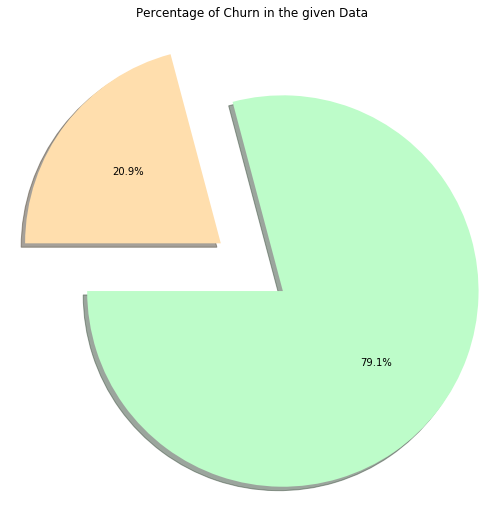

In [28]:
data = pd.DataFrame(Y_pred,columns=['stay'])
data = data['stay'].value_counts(sort = True)
chroma = ["#BDFCC9","#FFDEAD"]
rcParams['figure.figsize'] = 9,9
explode = [0.2,0.2]
plt.pie(data, explode=explode, colors=chroma, autopct='%1.1f%%', shadow=True, startangle=180,)
plt.title('Percentage of Churn in the given Data')
plt.show()

# display the data again

In [8]:
datainput

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


# find the accracy of your customer churn prediction 

In [29]:
#Accuracy
LR = metrics.accuracy_score(Y_test, Y_pred) * 100
print("\nThe accuracy score using the LR is -> ",LR)

#confusion matrix
cm=confusion_matrix(Y_test,Y_pred)
print("\nconfusion matrix : \n",cm)


The accuracy score using the LR is ->  81.47622427253371

confusion matrix : 
 [[939  85]
 [176 209]]
